In [1]:
# general and data handling
import numpy as np
import pandas as pd
import os
from collections import Counter

# Required RDKit modules
import rdkit as rd
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import RDConfig
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdFingerprintGenerator
from rdkit import DataStructs
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.rdMolDescriptors import GetAtomPairFingerprint
from rdkit.Chem.AtomPairs import Torsions
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys

# modeling
import sklearn as sk
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.decomposition import PCA
#from imblearn.over_sampling import ADASYN
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Graphing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import File:
mcf7 = pd.read_csv('V1/mcf7_V1.csv')
breast = pd.read_csv('V1/breast_V1.csv')
lung = pd.read_csv('V1/lung_V1.csv')
a549 = pd.read_csv('V1/a549_V1.csv')

In [3]:
print('MCF7 :',len(mcf7))
print('Breast :',len(breast))
print('Lung :',len(lung))
print('A549 :',len(a549))

MCF7 : 454
Breast : 538
Lung : 592
A549 : 375


In [4]:
mcf7["mol"] = [Chem.MolFromSmiles(x) for x in mcf7["CanonicalSMILES"]]
breast["mol"] = [Chem.MolFromSmiles(x) for x in breast["CanonicalSMILES"]]
lung["mol"] = [Chem.MolFromSmiles(x) for x in lung["CanonicalSMILES"]]
a549["mol"] = [Chem.MolFromSmiles(x) for x in a549["CanonicalSMILES"]]

In [5]:
print('MCF7 SMiles:',mcf7['CanonicalSMILES'].count())
print('Breast Smiles:',breast['CanonicalSMILES'].count())
print('lung Smiles:',lung['CanonicalSMILES'].count())
print('A549 Smiles:',a549['CanonicalSMILES'].count())

MCF7 SMiles: 454
Breast Smiles: 538
lung Smiles: 592
A549 Smiles: 375


In [6]:
# Maccs Fingerprint:
mcf7["Maccs"] = [MACCSkeys.GenMACCSKeys(x) for x in mcf7["mol"]]
breast["Maccs"] = [MACCSkeys.GenMACCSKeys(x) for x in breast["mol"]]
lung["Maccs"] = [MACCSkeys.GenMACCSKeys(x) for x in lung["mol"]]
a549["Maccs"] = [MACCSkeys.GenMACCSKeys(x) for x in a549["mol"]]

In [7]:
# Morgan 2 Fingerprint:
mcf7["morg2_fp"] = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits = 1024) for m in mcf7["mol"]]
breast["morg2_fp"] = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits = 1024) for m in breast["mol"]]
lung["morg2_fp"] = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits = 1024) for m in lung["mol"]]
a549["morg2_fp"] = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits = 1024) for m in a549["mol"]]

In [8]:
train_mcf7, test_mcf7 = train_test_split(mcf7, test_size=0.2, random_state=1,stratify=mcf7.Target.values)
train_breast, test_breast = train_test_split(breast, test_size=0.2, random_state=1,stratify=breast.Target.values)
train_lung, test_lung = train_test_split(lung, test_size=0.2, random_state=1,stratify=lung.Target.values)
train_a549, test_a549 = train_test_split(a549, test_size=0.2, random_state=1,stratify=a549.Target.values)

print('Training Data for MCF7:',len(train_mcf7),'\n')
print('Testing Data for MCF7:',len(test_mcf7),'\n')
print('***************************************************************************')
print('Training Data for Breast:',len(train_breast),'\n')
print('Testing Data for Breast:',len(test_breast),'\n')
print('***************************************************************************')
print('Training Data for lung:',len(train_lung),'\n')
print('Testing Data for lung:',len(test_lung),'\n')
print('***************************************************************************')
print('Training Data for a549:',len(train_a549),'\n')
print('Testing Data for a549:',len(test_a549),'\n')

Training Data for MCF7: 363 

Testing Data for MCF7: 91 

***************************************************************************
Training Data for Breast: 430 

Testing Data for Breast: 108 

***************************************************************************
Training Data for lung: 473 

Testing Data for lung: 119 

***************************************************************************
Training Data for a549: 300 

Testing Data for a549: 75 



In [9]:
def Counting(y):
    unique, counts = np.unique(y, return_counts=True)
    a=dict(zip(unique, counts))
    return str(a)

In [10]:
print('Train Set for MCF7 has:',Counting(train_mcf7['Target']))
print('Test Set for MCF7 has:',Counting(test_mcf7['Target']))
print('*********************************************************************')
print('Train Set for Breast has:',Counting(train_breast['Target']))
print('Test Set for Breast has:',Counting(test_breast['Target']))
print('*********************************************************************')
print('Train Set for Lung has:',Counting(train_lung['Target']))
print('Test Set for Lung has:',Counting(test_lung['Target']))
print('*********************************************************************')
print('Train Set for A549 has:',Counting(train_a549['Target']))
print('Test Set for A549 has:',Counting(test_a549['Target']))

Train Set for MCF7 has: {0: 204, 1: 159}
Test Set for MCF7 has: {0: 51, 1: 40}
*********************************************************************
Train Set for Breast has: {0: 236, 1: 194}
Test Set for Breast has: {0: 59, 1: 49}
*********************************************************************
Train Set for Lung has: {0: 249, 1: 224}
Test Set for Lung has: {0: 63, 1: 56}
*********************************************************************
Train Set for A549 has: {0: 157, 1: 143}
Test Set for A549 has: {0: 39, 1: 36}


In [11]:
def to_bit(fps):
    fp_np = []
    for fp in fps:
        arr = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(fp, arr)
        fp_np.append(arr)
    test = fp_np
    return test

### Maccs:

In [12]:
# MACCS Fingreprint:  # MCF7
X_Macc_train_mcf7=to_bit(train_mcf7['Maccs'])
y_Macc_train_mcf7=train_mcf7.Target.values

X_Macc_test_mcf7=to_bit(test_mcf7['Maccs'])
y_Macc_test_mcf7=test_mcf7.Target.values

In [13]:
# MACCS Fingreprint:  #Breast
X_Macc_train_breast=to_bit(train_breast['Maccs'])
y_Macc_train_breast=train_breast.Target.values

X_Macc_test_breast=to_bit(test_breast['Maccs'])
y_Macc_test_breast=test_breast.Target.values

In [14]:
# MACCS Fingreprint:  # Lung
X_Macc_train_lung=to_bit(train_lung['Maccs'])
y_Macc_train_lung=train_lung.Target.values

X_Macc_test_lung=to_bit(test_lung['Maccs'])
y_Macc_test_lung=test_lung.Target.values

In [15]:
# MACCS Fingreprint:  # A549
X_Macc_train_a549=to_bit(train_a549['Maccs'])
y_Macc_train_a549=train_a549.Target.values

X_Macc_test_a549=to_bit(test_a549['Maccs'])
y_Macc_test_a549=test_a549.Target.values

### Morgan2:

In [16]:
# Morgan 2 Fingreprint:   #MCF7
X_Morgan2_train_mcf7=to_bit(train_mcf7['morg2_fp'])
y_Morgan2_train_mcf7=train_mcf7.Target.values

X_Morgan2_test_mcf7=to_bit(test_mcf7['morg2_fp'])
y_Morgan2_test_mcf7=test_mcf7.Target.values

In [17]:
# Morgan 2 Fingreprint:  #Breast
X_Morgan2_train_breast=to_bit(train_breast['morg2_fp'])
y_Morgan2_train_breast=train_breast.Target.values

X_Morgan2_test_breast=to_bit(test_breast['morg2_fp'])
y_Morgan2_test_breast=test_breast.Target.values

In [18]:
# Morgan 2 Fingreprint:   #Lung
X_Morgan2_train_lung=to_bit(train_lung['morg2_fp'])
y_Morgan2_train_lung=train_lung.Target.values

X_Morgan2_test_lung=to_bit(test_lung['morg2_fp'])
y_Morgan2_test_lung=test_lung.Target.values

In [19]:
# Morgan 2 Fingreprint:   #A549
X_Morgan2_train_a549=to_bit(train_a549['morg2_fp'])
y_Morgan2_train_a549=train_a549.Target.values

X_Morgan2_test_a549=to_bit(test_a549['morg2_fp'])
y_Morgan2_test_a549=test_a549.Target.values

### Models:

<ol>
<li>Random forest (RF)</li>
<li>SVM</li>
<li>KNN</li>
<li>eXtreme Gradient Boosting (XGBoost)</li>
</ol>

In [20]:
def permonce_measure(y_test,y_pred):
    print("Accuracy Score:", round(accuracy_score(y_test, y_pred),3))
    print('Balanced Accuracy:',round(balanced_accuracy_score(y_test,y_pred),3))
    print("MCC Score:",round(matthews_corrcoef(y_test, y_pred),3))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    a3= Sensitivity = tp/(tp+fn)
    a4= Specificity = tn/(tn+fp)
    print("Sensitivity Score:",round(a3,3))
    print("Specificity Score:",round(a4,3))
    
    test_measure = {"Accuracy_test":round(accuracy_score(y_test, y_pred),3),
                    "Balanced Accuracy_test":round(balanced_accuracy_score(y_test,y_pred),3),
                    "MCC Score_test":round(matthews_corrcoef(y_test, y_pred),3),
                    "Sensitivity Score_test":round(a3,3),
                    "Specificity Score_test":round(a4,3)
                   }
    score=accuracy_score(y_test, y_pred)
    cm_macc_test = metrics.confusion_matrix(y_test, y_pred)
    #Graph:
    print('\n********************** Graph *****************************\n')
    plt.figure(figsize=(5,5))
    sns.heatmap(cm_macc_test, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    return test_measure

def roc_auc(y_val,prediction_probs,model_name):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_val))]
    # keep probabilities for the positive outcome only
    prediction_probs = prediction_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_val, ns_probs)
    prediction_probs_auc = roc_auc_score(y_val, prediction_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('ROC AUC=%.3f' % (prediction_probs_auc))
    roc_auc = {"AUC_Score_test":round(prediction_probs_auc,3)}
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
    prediction_probs_fpr, prediction_probs_tpr, _ = roc_curve(y_val, prediction_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(prediction_probs_fpr, prediction_probs_tpr, marker='.', label=model_name)
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    return roc_auc

def cv_result(best_model,X_train,y_train):
    scoring={'accuracy':'accuracy',
            'balanced_accuracy':'balanced_accuracy',
            'roc_auc':'roc_auc',
            'specificity':make_scorer(recall_score,pos_label=0),
            'sensitivity':make_scorer(recall_score,pos_label=1),
            'MCC':make_scorer(matthews_corrcoef)}
    cv=cross_validate(best_model,X_train,y_train, cv=5,scoring=scoring)
    cv_df=pd.DataFrame(cv)
    Mean={'Accuracy':round(cv['test_accuracy'].mean(),3),
          'Balanced Accuracy':round(cv['test_balanced_accuracy'].mean(),3),
          'AUC_Score':round(cv['test_roc_auc'].mean(),3),
          'Specificity':round(cv['test_specificity'].mean(),3),
          'Sensitivity':round(cv['test_sensitivity'].mean(),3),
          'MCC':round(cv['test_MCC'].mean(),3)
         }
    print('Accuracy:',round(cv['test_accuracy'].mean(),3),'\nBalanced_accuracy:',round(cv['test_balanced_accuracy'].mean(),3),'\nAUC_Score:',round(cv['test_roc_auc'].mean(),3),'\nSpecificity:',round(cv['test_specificity'].mean(),3),'\nSensitivity:',round(cv['test_sensitivity'].mean(),3),'\nMCC:',round(cv['test_MCC'].mean(),3))
    return cv_df,Mean

## KNN:

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef,accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,balanced_accuracy_score,recall_score,make_scorer
from sklearn.model_selection import cross_validate
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# KNN:
knn = KNeighborsClassifier()

In [23]:
# Parameters
param_grid_knn={
    'n_neighbors':[int(x) for x in range(1,6)],
    'weights':['uniform','distance']
}

## For Maccs:

#### For MCF7

In [309]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_knn_mcf7_maccs = GridSearchCV(estimator = knn, param_grid = param_grid_knn, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_knn_mcf7_maccs.fit(X_Macc_train_mcf7, y_Macc_train_mcf7)
print('\n******************************** Done *****************************************************')
MCF7_Maccs_knn=pd.DataFrame(grid_search_knn_mcf7_maccs.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 10 candidates, totalling 50 fits

******************************** Done *****************************************************
CPU times: user 765 ms, sys: 29.7 ms, total: 795 ms
Wall time: 4.45 s


In [310]:
print('  Best Parameter are:\n',grid_search_knn_mcf7_maccs.best_estimator_)

  Best Parameter are:
 KNeighborsClassifier(n_neighbors=1)


In [311]:
best_model_knn_MCF7_Maccs = grid_search_knn_mcf7_maccs.best_estimator_
#best_model_knn_MCF7_Maccs=KNeighborsClassifier(weights='distance')

In [312]:
knn_mcf7_maccs_cv,knn_mcf7_maccs_mean=cv_result(best_model_knn_MCF7_Maccs,X_Macc_train_mcf7,y_Macc_train_mcf7)

Accuracy: 0.758 
Balanced_accuracy: 0.758 
AUC_Score: 0.758 
Specificity: 0.754 
Sensitivity: 0.761 
MCC: 0.515


In [313]:
knn_mcf7_maccs_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.000998,0.046405,0.753425,0.749619,0.749619,0.780488,0.718750,0.499238
1,0.000707,0.044711,0.767123,0.768674,0.768674,0.756098,0.781250,0.533699
2,0.000822,0.052610,0.712329,0.709604,0.709604,0.731707,0.687500,0.417935
3,0.000726,0.031762,0.819444,0.813926,0.813926,0.853659,0.774194,0.630587
4,0.018184,0.042373,0.736111,0.746875,0.746875,0.650000,0.843750,0.495495


#### MCF7 Test Set:

Accuracy Score: 0.758
Balanced Accuracy: 0.757
MCC Score: 0.512
Sensitivity Score: 0.75
Specificity Score: 0.765

********************** Graph *****************************



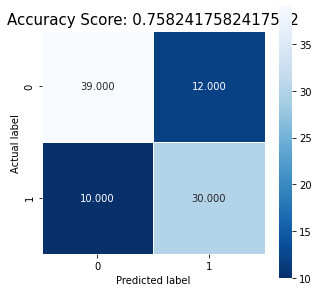

In [314]:
best_model_knn_MCF7_Maccs.fit(X_Macc_train_mcf7, y_Macc_train_mcf7)
prediction_mcf7_maccs_knn=best_model_knn_MCF7_Maccs.predict(X_Macc_test_mcf7)
knn_test_mcf7_maccs = permonce_measure(y_Macc_test_mcf7,prediction_mcf7_maccs_knn)

No Skill: ROC AUC=0.500
ROC AUC=0.757


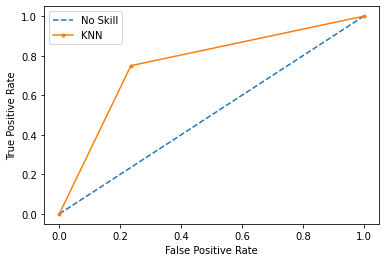

In [315]:
prediction_mcf7_maccs_knn_probs = best_model_knn_MCF7_Maccs.predict_proba(X_Macc_test_mcf7)
roc_auc_mcf7_maccs=roc_auc(y_Macc_test_mcf7,prediction_mcf7_maccs_knn_probs,'KNN')
knn_test_mcf7_maccs.update(roc_auc_mcf7_maccs)

In [316]:
#MCF7_Maccs_knn.to_csv('MCF7_Maccs_knn_auc.csv',index=False)

--------------------------------------------------------------------------------------------------------------------

### For Breast:

In [317]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_knn_breast_maccs = GridSearchCV(estimator = knn, param_grid = param_grid_knn, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_knn_breast_maccs.fit(X_Macc_train_breast, y_Macc_train_breast)
print('\n******************************** Done *****************************************************')
Breast_Maccs_knn=pd.DataFrame(grid_search_knn_breast_maccs.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 10 candidates, totalling 50 fits

******************************** Done *****************************************************
CPU times: user 533 ms, sys: 267 µs, total: 534 ms
Wall time: 1.37 s


In [318]:
print('  Best Parameter are:\n',grid_search_knn_breast_maccs.best_estimator_)

  Best Parameter are:
 KNeighborsClassifier(n_neighbors=1)


In [319]:
best_model_knn_Breast_Maccs = grid_search_knn_breast_maccs.best_estimator_
#best_model_knn_Breast_Maccs=KNeighborsClassifier(weights='distance')

In [320]:
knn_breast_maccs_cv,knn_breast_maccs_mean=cv_result(best_model_knn_Breast_Maccs,X_Macc_train_breast,y_Macc_train_breast)

Accuracy: 0.765 
Balanced_accuracy: 0.761 
AUC_Score: 0.761 
Specificity: 0.796 
Sensitivity: 0.726 
MCC: 0.53


In [321]:
knn_breast_maccs_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.001107,0.046026,0.860465,0.863612,0.863612,0.829787,0.897436,0.724070
1,0.000731,0.043834,0.767442,0.758865,0.758865,0.851064,0.666667,0.530017
2,0.017292,0.042969,0.779070,0.780415,0.780415,0.765957,0.794872,0.558549
3,0.000772,0.043036,0.709302,0.714403,0.714403,0.659574,0.769231,0.427989
4,0.000754,0.036227,0.709302,0.687500,0.687500,0.875000,0.500000,0.410118


#### Breast Test Set:

Accuracy Score: 0.787
Balanced Accuracy: 0.784
MCC Score: 0.57
Sensitivity Score: 0.755
Specificity Score: 0.814

********************** Graph *****************************



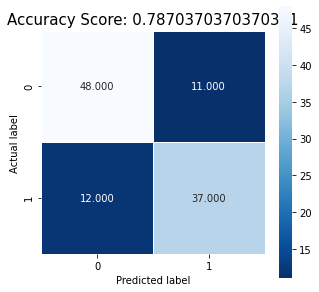

In [322]:
best_model_knn_Breast_Maccs.fit(X_Macc_train_breast, y_Macc_train_breast)
prediction_breast_maccs_knn=best_model_knn_Breast_Maccs.predict(X_Macc_test_breast)
knn_test_breast_maccs = permonce_measure(y_Macc_test_breast,prediction_breast_maccs_knn)

No Skill: ROC AUC=0.500
ROC AUC=0.784


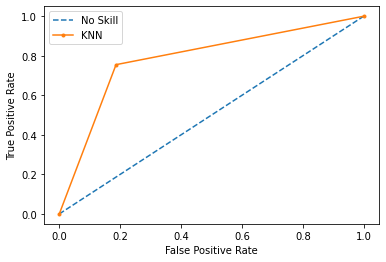

In [323]:
prediction_breast_maccs_knn_probs = best_model_knn_Breast_Maccs.predict_proba(X_Macc_test_breast)
roc_auc_breast_maccs=roc_auc(y_Macc_test_breast,prediction_breast_maccs_knn_probs,'KNN')
knn_test_breast_maccs.update(roc_auc_breast_maccs)

In [324]:
roc_auc

<function __main__.roc_auc(y_val, prediction_probs, model_name)>

In [325]:
#Breast_Maccs_knn.to_csv('Breast_Maccs_knn_auc.csv',index=False)

--------------------------------------------------------------------------------------------------------------------

### For Lung:

In [326]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_knn_lung_maccs = GridSearchCV(estimator = knn, param_grid = param_grid_knn, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_knn_lung_maccs.fit(X_Macc_train_lung, y_Macc_train_lung)
print('\n******************************** Done *****************************************************')
Lung_Maccs_knn=pd.DataFrame(grid_search_knn_lung_maccs.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 10 candidates, totalling 50 fits

******************************** Done *****************************************************
CPU times: user 569 ms, sys: 13.4 ms, total: 582 ms
Wall time: 1.32 s


In [327]:
#Lung_Maccs_knn.to_csv('Lung_Maccs_knn_auc.csv',index=False)

In [328]:
print('  Best Parameter are:\n',grid_search_knn_lung_maccs.best_estimator_)

  Best Parameter are:
 KNeighborsClassifier(n_neighbors=3, weights='distance')


In [329]:
best_model_knn_Lung_Maccs = grid_search_knn_lung_maccs.best_estimator_
#best_model_knn_Lung_Maccs=KNeighborsClassifier(weights='distance')

In [330]:
knn_lung_maccs_cv,knn_lung_maccs_mean=cv_result(best_model_knn_Lung_Maccs,X_Macc_train_lung,y_Macc_train_lung)

Accuracy: 0.67 
Balanced_accuracy: 0.667 
AUC_Score: 0.706 
Specificity: 0.735 
Sensitivity: 0.598 
MCC: 0.339


In [331]:
knn_lung_maccs_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.006854,0.044199,0.705263,0.702222,0.723111,0.760000,0.644444,0.407719
1,0.000771,0.043050,0.694737,0.688889,0.773111,0.800000,0.577778,0.388822
2,0.000806,0.040812,0.663158,0.656667,0.688000,0.780000,0.533333,0.324331
3,0.000796,0.021295,0.638298,0.635828,0.685261,0.693878,0.577778,0.273648
4,0.026468,0.073445,0.648936,0.649545,0.661136,0.640000,0.659091,0.298481


#### Lung Test Set:

Accuracy Score: 0.681
Balanced Accuracy: 0.673
MCC Score: 0.361
Sensitivity Score: 0.536
Specificity Score: 0.81

********************** Graph *****************************



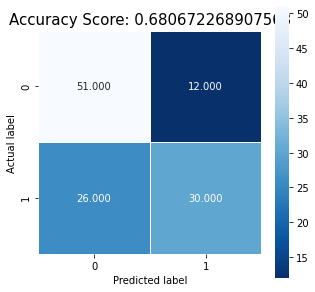

In [332]:
best_model_knn_Lung_Maccs.fit(X_Macc_train_lung, y_Macc_train_lung)
prediction_lung_maccs_knn=best_model_knn_Lung_Maccs.predict(X_Macc_test_lung)
knn_test_lung_maccs = permonce_measure(y_Macc_test_lung,prediction_lung_maccs_knn)

No Skill: ROC AUC=0.500
ROC AUC=0.785


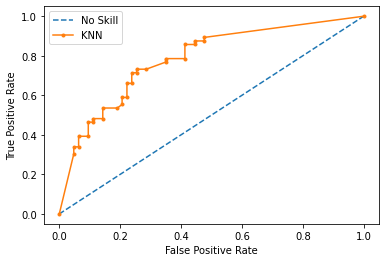

In [333]:
prediction_lung_maccs_knn_probs = best_model_knn_Lung_Maccs.predict_proba(X_Macc_test_lung)
roc_auc_lung_maccs=roc_auc(y_Macc_test_lung,prediction_lung_maccs_knn_probs,'KNN')
knn_test_lung_maccs.update(roc_auc_lung_maccs)

--------------------------------------------------------------------------------------------------------------------

### For A549:

In [334]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_knn_a549_maccs = GridSearchCV(estimator = knn, param_grid = param_grid_knn, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_knn_a549_maccs.fit(X_Macc_train_a549, y_Macc_train_a549)
print('\n******************************** Done *****************************************************')
A549_Maccs_knn=pd.DataFrame(grid_search_knn_a549_maccs.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 10 candidates, totalling 50 fits

******************************** Done *****************************************************
CPU times: user 389 ms, sys: 7.96 ms, total: 397 ms
Wall time: 1.14 s


In [335]:
#A549_Maccs_knn.to_csv('A549_Maccs_knn_auc.csv',index=False)

In [336]:
print('  Best Parameter are:\n',grid_search_knn_a549_maccs.best_estimator_)

  Best Parameter are:
 KNeighborsClassifier()


In [337]:
best_model_knn_A549_Maccs = grid_search_knn_a549_maccs.best_estimator_
#best_model_knn_A549_Maccs=KNeighborsClassifier(n_neighbors=2, weights='distance')

In [338]:
knn_a549_maccs_cv,knn_a549_maccs_mean=cv_result(best_model_knn_A549_Maccs,X_Macc_train_a549,y_Macc_train_a549)

Accuracy: 0.67 
Balanced_accuracy: 0.668 
AUC_Score: 0.744 
Specificity: 0.706 
Sensitivity: 0.63 
MCC: 0.338


In [339]:
knn_a549_maccs_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.004792,0.048887,0.750000,0.745536,0.805804,0.812500,0.678571,0.496929
1,0.000687,0.058405,0.683333,0.680804,0.728795,0.718750,0.642857,0.362620
2,0.000642,0.039038,0.666667,0.668521,0.736374,0.612903,0.724138,0.338551
3,0.000629,0.046504,0.550000,0.545606,0.625139,0.677419,0.413793,0.094587
4,0.000671,0.061725,0.700000,0.699666,0.822024,0.709677,0.689655,0.399333


#### A549 Test Set:

Accuracy Score: 0.68
Balanced Accuracy: 0.682
MCC Score: 0.364
Sensitivity Score: 0.722
Specificity Score: 0.641

********************** Graph *****************************



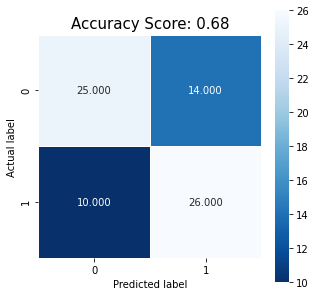

In [340]:
best_model_knn_A549_Maccs.fit(X_Macc_train_a549, y_Macc_train_a549)
prediction_a549_maccs_knn=best_model_knn_A549_Maccs.predict(X_Macc_test_a549)
knn_test_a549_maccs = permonce_measure(y_Macc_test_a549,prediction_a549_maccs_knn)

No Skill: ROC AUC=0.500
ROC AUC=0.730


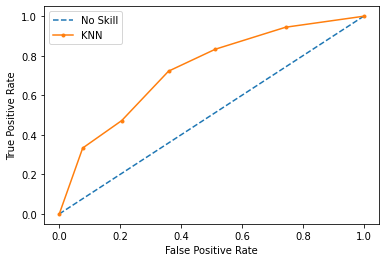

In [341]:
prediction_a549_maccs_knn_probs = best_model_knn_A549_Maccs.predict_proba(X_Macc_test_a549)
roc_auc_a549_maccs=roc_auc(y_Macc_test_a549,prediction_a549_maccs_knn_probs,'KNN')
knn_test_a549_maccs.update(roc_auc_a549_maccs)

---------------------------------------------------------------------------------------------------------------------

## For Morgan2:

### For MCF7:

In [342]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_knn_mcf7_morgan2 = GridSearchCV(estimator = knn, param_grid = param_grid_knn, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_knn_mcf7_morgan2.fit(X_Morgan2_train_mcf7, y_Morgan2_train_mcf7)
print('\n******************************** Done ******************************************************')
MCF7_Morgan2_knn=pd.DataFrame(grid_search_knn_mcf7_morgan2.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 10 candidates, totalling 50 fits

******************************** Done ******************************************************
CPU times: user 537 ms, sys: 27.9 ms, total: 565 ms
Wall time: 1.7 s


In [343]:
#MCF7_Morgan2_knn.to_csv('MCF7_Morgan2_knn_auc.csv',index=False)

In [344]:
print('  Best Parameter are:\n',grid_search_knn_mcf7_morgan2.best_estimator_)

  Best Parameter are:
 KNeighborsClassifier(n_neighbors=1)


In [24]:
best_model_knn_MCF7_Morgan2 = grid_search_knn_mcf7_morgan2.best_estimator_
#best_model_knn_MCF7_Morgan2=KNeighborsClassifier(n_neighbors=4, weights='distance')

In [25]:
knn_mcf7_morgan2_cv,knn_mcf7_morgan2_mean=cv_result(best_model_knn_MCF7_Morgan2,X_Morgan2_train_mcf7,y_Morgan2_train_mcf7)

Accuracy: 0.779 
Balanced_accuracy: 0.763 
AUC_Score: 0.863 
Specificity: 0.896 
Sensitivity: 0.629 
MCC: 0.558


In [26]:
knn_mcf7_morgan2_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.001942,0.033333,0.808219,0.788110,0.831174,0.951220,0.625000,0.623101
1,0.001883,0.032371,0.808219,0.791540,0.877287,0.926829,0.656250,0.615873
2,0.001063,0.019237,0.767123,0.744665,0.896723,0.926829,0.562500,0.536361
3,0.001054,0.025950,0.763889,0.741542,0.883163,0.902439,0.580645,0.519277
4,0.001028,0.024384,0.750000,0.746875,0.824609,0.775000,0.718750,0.493750


#### Test set for MCF7:

Accuracy Score: 0.802
Balanced Accuracy: 0.786
MCC Score: 0.603
Sensitivity Score: 0.65
Specificity Score: 0.922

********************** Graph *****************************



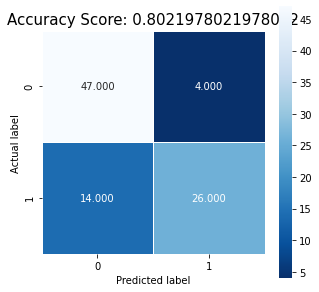

In [27]:
best_model_knn_MCF7_Morgan2.fit(X_Morgan2_train_mcf7, y_Morgan2_train_mcf7)
prediction_mcf7_morgan2_knn=best_model_knn_MCF7_Morgan2.predict(X_Morgan2_test_mcf7)
knn_test_mcf7_morgan2 = permonce_measure(y_Morgan2_test_mcf7,prediction_mcf7_morgan2_knn)

No Skill: ROC AUC=0.500
ROC AUC=0.839


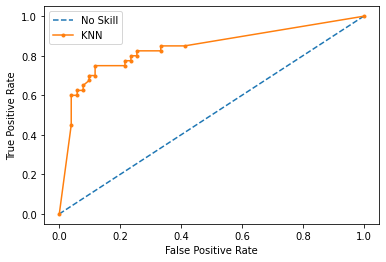

In [28]:
prediction_mcf7_morgan2_knn_probs = best_model_knn_MCF7_Morgan2.predict_proba(X_Morgan2_test_mcf7)
roc_auc_mcf7_morgan2=roc_auc(y_Morgan2_test_mcf7,prediction_mcf7_morgan2_knn_probs,'KNN')
knn_test_mcf7_morgan2.update(roc_auc_mcf7_morgan2)

-------------------------------------------------------------------------------------------------------------------

### For Breast:

In [350]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_knn_breast_morgan2 = GridSearchCV(estimator = knn, param_grid = param_grid_knn, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_knn_breast_morgan2.fit(X_Morgan2_train_breast, y_Morgan2_train_breast)
print('\n******************************** Done ******************************************************')
Breast_Morgan2_knn=pd.DataFrame(grid_search_knn_breast_morgan2.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 10 candidates, totalling 50 fits

******************************** Done ******************************************************
CPU times: user 630 ms, sys: 14.9 ms, total: 644 ms
Wall time: 1.89 s


In [351]:
#Breast_Morgan2_knn.to_csv('Breast_Morgan2_knn_auc.csv',index=False)

In [352]:
print('  Best Parameter are:\n',grid_search_knn_breast_morgan2.best_estimator_)

  Best Parameter are:
 KNeighborsClassifier(n_neighbors=1)


In [353]:
best_model_knn_Breast_Morgan2 = grid_search_knn_breast_morgan2.best_estimator_
#best_model_knn_Breast_Morgan2=KNeighborsClassifier(weights='distance')

In [354]:
knn_breast_morgan2_cv,knn_breast_morgan2_mean=cv_result(best_model_knn_Breast_Morgan2,X_Morgan2_train_breast,y_Morgan2_train_breast)

Accuracy: 0.777 
Balanced_accuracy: 0.771 
AUC_Score: 0.771 
Specificity: 0.822 
Sensitivity: 0.721 
MCC: 0.555


In [355]:
knn_breast_morgan2_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.002172,0.091393,0.802326,0.810420,0.810420,0.723404,0.897436,0.622370
1,0.001335,0.076658,0.779070,0.771686,0.771686,0.851064,0.692308,0.553270
2,0.022902,0.060016,0.813953,0.805783,0.805783,0.893617,0.717949,0.626079
3,0.001333,0.098296,0.755814,0.756956,0.756956,0.744681,0.769231,0.511822
4,0.001314,0.071901,0.732558,0.711075,0.711075,0.895833,0.526316,0.461682


#### Test set for Breast:

Accuracy Score: 0.806
Balanced Accuracy: 0.805
MCC Score: 0.609
Sensitivity Score: 0.796
Specificity Score: 0.814

********************** Graph *****************************



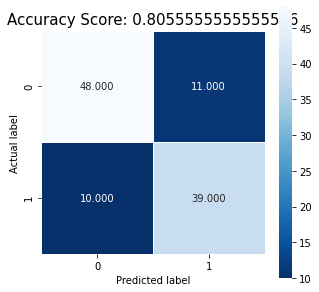

In [356]:
best_model_knn_Breast_Morgan2.fit(X_Morgan2_train_breast, y_Morgan2_train_breast)
prediction_breast_morgan2_knn=best_model_knn_Breast_Morgan2.predict(X_Morgan2_test_breast)
knn_test_breast_morgan2 = permonce_measure(y_Morgan2_test_breast,prediction_breast_morgan2_knn)

No Skill: ROC AUC=0.500
ROC AUC=0.805


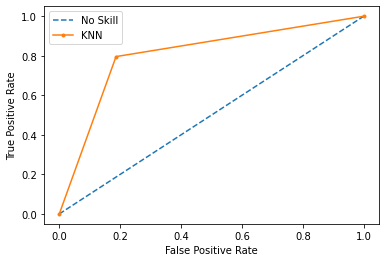

In [357]:
prediction_breast_morgan2_knn_probs = best_model_knn_Breast_Morgan2.predict_proba(X_Morgan2_test_breast)
roc_auc_breast_morgan2=roc_auc(y_Morgan2_test_breast,prediction_breast_morgan2_knn_probs,'KNN')
knn_test_breast_morgan2.update(roc_auc_breast_morgan2)

--------------------------------------------------------------------------------------------------------------------

### For Lung:

In [358]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_knn_lung_morgan2 = GridSearchCV(estimator = knn, param_grid = param_grid_knn, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_knn_lung_morgan2.fit(X_Morgan2_train_lung, y_Morgan2_train_lung)
print('\n******************************** Done ******************************************************')
Lung_Morgan2_knn=pd.DataFrame(grid_search_knn_lung_morgan2.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 10 candidates, totalling 50 fits

******************************** Done ******************************************************
CPU times: user 682 ms, sys: 35.2 ms, total: 717 ms
Wall time: 2.13 s


In [359]:
#Lung_Morgan2_knn.to_csv('Lung_Morgan2_knn_auc.csv',index=False)

In [360]:
print('  Best Parameter are:\n',grid_search_knn_lung_morgan2.best_estimator_)

  Best Parameter are:
 KNeighborsClassifier(n_neighbors=1)


In [361]:
best_model_knn_Lung_Morgan2 = grid_search_knn_lung_morgan2.best_estimator_
#best_model_knn_Lung_Morgan2= KNeighborsClassifier(weights='distance')

In [362]:
knn_lung_morgan2_cv,knn_lung_morgan2_mean=cv_result(best_model_knn_Lung_Morgan2,X_Morgan2_train_lung,y_Morgan2_train_lung)

Accuracy: 0.7 
Balanced_accuracy: 0.698 
AUC_Score: 0.698 
Specificity: 0.731 
Sensitivity: 0.665 
MCC: 0.399


In [363]:
knn_lung_morgan2_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.002519,0.081773,0.663158,0.663333,0.663333,0.660000,0.666667,0.326232
1,0.001509,0.067428,0.757895,0.753333,0.753333,0.840000,0.666667,0.516398
2,0.001465,0.067574,0.621053,0.618889,0.618889,0.660000,0.577778,0.238521
3,0.022372,0.050530,0.712766,0.713605,0.713605,0.693878,0.733333,0.426921
4,0.001396,0.065389,0.744681,0.740909,0.740909,0.800000,0.681818,0.486259


#### Test set for Lung:

Accuracy Score: 0.765
Balanced Accuracy: 0.761
MCC Score: 0.528
Sensitivity Score: 0.696
Specificity Score: 0.825

********************** Graph *****************************



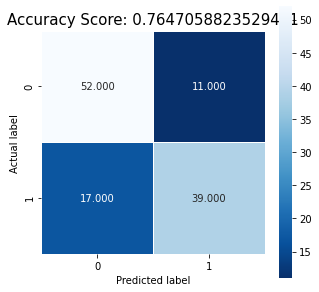

In [364]:
best_model_knn_Lung_Morgan2.fit(X_Morgan2_train_lung, y_Morgan2_train_lung)
prediction_lung_morgan2_knn=best_model_knn_Lung_Morgan2.predict(X_Morgan2_test_lung)
knn_test_lung_morgan2 = permonce_measure(y_Morgan2_test_lung,prediction_lung_morgan2_knn)

No Skill: ROC AUC=0.500
ROC AUC=0.761


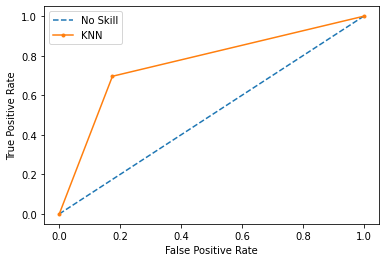

In [365]:
prediction_lung_morgan2_knn_probs = best_model_knn_Lung_Morgan2.predict_proba(X_Morgan2_test_lung)
roc_auc_lung_morgan2=roc_auc(y_Morgan2_test_lung,prediction_lung_morgan2_knn_probs,'KNN')
knn_test_lung_morgan2.update(roc_auc_lung_morgan2)

---------------------------------------------------------------------------------------------------------------------

### For A549:

In [366]:
%%time
print('********************************** Wait *****************************************************\n')
grid_search_knn_a549_morgan2 = GridSearchCV(estimator = knn, param_grid = param_grid_knn, cv = 5, n_jobs = -1, verbose = 2,scoring='recall')
grid_search_knn_a549_morgan2.fit(X_Morgan2_train_a549, y_Morgan2_train_a549)
print('\n******************************** Done ******************************************************')
A549_Morgan2_knn=pd.DataFrame(grid_search_knn_a549_morgan2.cv_results_)

********************************** Wait *****************************************************

Fitting 5 folds for each of 10 candidates, totalling 50 fits

******************************** Done ******************************************************
CPU times: user 464 ms, sys: 12.3 ms, total: 476 ms
Wall time: 1.25 s


In [367]:
#A549_Morgan2_knn.to_csv('A549_Morgan2_knn_auc.csv',index=False)

In [368]:
print('  Best Parameter are:\n',grid_search_knn_a549_morgan2.best_estimator_)

  Best Parameter are:
 KNeighborsClassifier(n_neighbors=1)


In [369]:
best_model_knn_A549_Morgan2 = grid_search_knn_a549_morgan2.best_estimator_
#best_model_knn_A549_Morgan2 = KNeighborsClassifier(n_neighbors=4, weights='distance')

In [370]:
knn_a549_morgan2_cv,knn_a549_morgan2_mean=cv_result(best_model_knn_A549_Morgan2,X_Morgan2_train_a549,y_Morgan2_train_a549)

Accuracy: 0.72 
Balanced_accuracy: 0.718 
AUC_Score: 0.718 
Specificity: 0.765 
Sensitivity: 0.672 
MCC: 0.448


In [371]:
knn_a549_morgan2_cv

,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_roc_auc,test_specificity,test_sensitivity,test_MCC
0,0.009735,0.078139,0.750000,0.747768,0.747768,0.781250,0.714286,0.496924
1,0.001019,0.055753,0.650000,0.651786,0.651786,0.625000,0.678571,0.303064
2,0.019739,0.033199,0.683333,0.685762,0.685762,0.612903,0.758621,0.374663
3,0.000997,0.051967,0.716667,0.711346,0.711346,0.870968,0.551724,0.448083
4,0.000994,0.046767,0.800000,0.795328,0.795328,0.935484,0.655172,0.618832


#### Test set for A549:

Accuracy Score: 0.733
Balanced Accuracy: 0.736
MCC Score: 0.475
Sensitivity Score: 0.806
Specificity Score: 0.667

********************** Graph *****************************



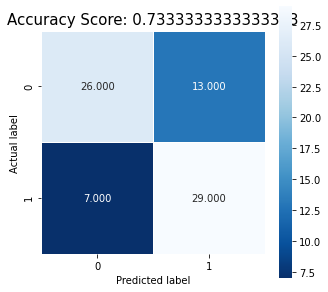

In [372]:
best_model_knn_A549_Morgan2.fit(X_Morgan2_train_a549, y_Morgan2_train_a549)
prediction_a549_morgan2_knn=best_model_knn_A549_Morgan2.predict(X_Morgan2_test_a549)
knn_test_a549_morgan2 = permonce_measure(y_Morgan2_test_a549,prediction_a549_morgan2_knn)

No Skill: ROC AUC=0.500
ROC AUC=0.736


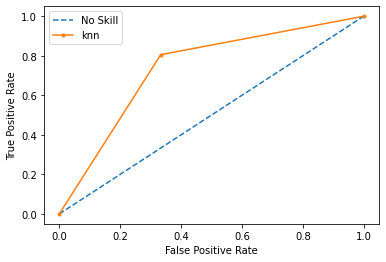

In [373]:
prediction_a549_morgan2_knn_probs = best_model_knn_A549_Morgan2.predict_proba(X_Morgan2_test_a549)
roc_auc_a549_morgan2=roc_auc(y_Morgan2_test_a549,prediction_a549_morgan2_knn_probs,'knn')
knn_test_a549_morgan2.update(roc_auc_a549_morgan2)

## EnD!

In [374]:
Model = pd.DataFrame({'Model':['KNN_MCF7_MACCS','KNN_Breast_MACCS','KNN_Lung_MACCS','KNN_A549_MACCS','KNN_MCF7_MORGAN2','KNN_Breast_MORGAN2','KNN_Lung_MORGAN2','KNN_A549_MORGAN2']})
parameters=pd.DataFrame([grid_search_knn_mcf7_maccs.best_params_,grid_search_knn_breast_maccs.best_params_,grid_search_knn_lung_maccs.best_params_,grid_search_knn_a549_maccs.best_params_,grid_search_knn_mcf7_morgan2.best_params_,grid_search_knn_breast_morgan2.best_params_,grid_search_knn_lung_morgan2.best_params_,grid_search_knn_a549_morgan2.best_params_])
test_set=pd.DataFrame([knn_test_mcf7_maccs,knn_test_breast_maccs,knn_test_lung_maccs,knn_test_a549_maccs,knn_test_mcf7_morgan2,knn_test_breast_morgan2,knn_test_lung_morgan2,knn_test_a549_morgan2])
cv_set=pd.DataFrame([knn_mcf7_maccs_mean,knn_breast_maccs_mean,knn_lung_maccs_mean,knn_a549_maccs_mean,knn_mcf7_morgan2_mean,knn_breast_morgan2_mean,knn_lung_morgan2_mean,knn_a549_morgan2_mean])
final_result=pd.concat([Model,parameters,cv_set,test_set],axis=1)
final_result

,Model,n_neighbors,weights,Accuracy,Balanced Accuracy,AUC_Score,Specificity,Sensitivity,MCC,Accuracy_test,Balanced Accuracy_test,MCC Score_test,Sensitivity Score_test,Specificity Score_test,AUC_Score_test
0,KNN_MCF7_MACCS,1,uniform,0.758,0.758,0.758,0.754,0.761,0.515,0.758,0.757,0.512,0.750,0.765,0.757
1,KNN_Breast_MACCS,1,uniform,0.765,0.761,0.761,0.796,0.726,0.530,0.787,0.784,0.570,0.755,0.814,0.784
2,KNN_Lung_MACCS,3,distance,0.670,0.667,0.706,0.735,0.598,0.339,0.681,0.673,0.361,0.536,0.810,0.785
3,KNN_A549_MACCS,5,uniform,0.670,0.668,0.744,0.706,0.630,0.338,0.680,0.682,0.364,0.722,0.641,0.730
4,KNN_MCF7_MORGAN2,1,uniform,0.791,0.784,0.784,0.838,0.730,0.578,0.747,0.737,0.483,0.650,0.824,0.737
5,KNN_Breast_MORGAN2,1,uniform,0.777,0.771,0.771,0.822,0.721,0.555,0.806,0.805,0.609,0.796,0.814,0.805
6,KNN_Lung_MORGAN2,1,uniform,0.700,0.698,0.698,0.731,0.665,0.399,0.765,0.761,0.528,0.696,0.825,0.761
7,KNN_A549_MORGAN2,1,uniform,0.720,0.718,0.718,0.765,0.672,0.448,0.733,0.736,0.475,0.806,0.667,0.736
